In [ ]:
# ============== TRAINING SCRIPT ==============

# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
print("Libraries imported successfully.")


# --- 2. Load and Prepare Data (Milestone 2) ---
print("🔹 Loading dataset...")
# CORRECTED FILENAME HERE
data = pd.read_csv('chronickidneydisease.csv') 
data = data.drop('id', axis=1)

# --- 3. Rename Columns ---
data.columns = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 
    'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 
    'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 
    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class'
]
print("✅ Columns renamed.")

# --- 4. Correcting Data Types and Errors ---
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace='\tno', value='no')
data['class'] = data['class'].replace(to_replace='ckd\t', value='ckd')
print("✅ Data types and entry errors corrected.")

# --- 5. Robust Missing Value Handling ---
print("🔧 Handling missing values...")
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)
print("✅ Missing values handled.")

# --- 6. Label Encoding ---
print("🔹 Applying Label Encoding...")
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
print("✅ Label Encoding complete.")

# --- 7. Feature Selection ---
sel_cols = [
    'red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea', 'pedal_edema', 'anemia', 
    'diabetes_mellitus', 'coronary_artery_disease'
]
x = data[sel_cols]
y = data['class']
print(f"✅ Features selected.")

# --- 8. Train-Test Split ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print("✅ Data split into training and testing sets.")

# --- 9. Model Training ---
print("🔹 Training Logistic Regression model...")
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
print("✅ Model training complete.")

# --- 10. Save the Model ---
model_save_path = "../CKD.pkl"
pickle.dump(lgr, open(model_save_path, 'wb'))
print(f"✅ Model saved successfully as '{model_save_path}'")
print("\n🎉 Training pipeline complete!")

Libraries imported successfully.
🔹 Loading dataset...
✅ Columns renamed.
✅ Data types and entry errors corrected.
🔧 Handling missing values...
✅ Missing values handled.
🔹 Applying Label Encoding...
✅ Label Encoding complete.
✅ Features selected.
✅ Data split into training and testing sets.
🔹 Training Logistic Regression model...
✅ Model training complete.
✅ Model saved successfully as '../CKD.pkl'

🎉 Training pipeline complete!


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6880\1935440437.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6880\1935440437.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

--- Generating Graphs for Milestone 3: Exploratory Data Analysis ---

Graph 1: Distribution of Diagnosis


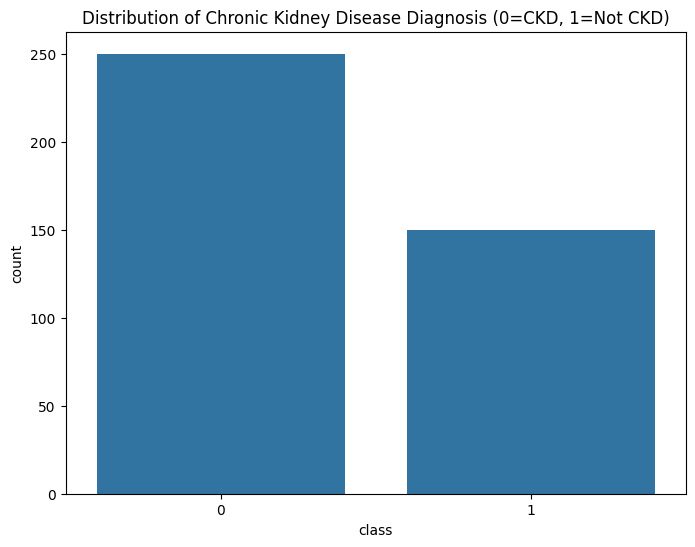


Graph 2: Correlation Heatmap of All Features


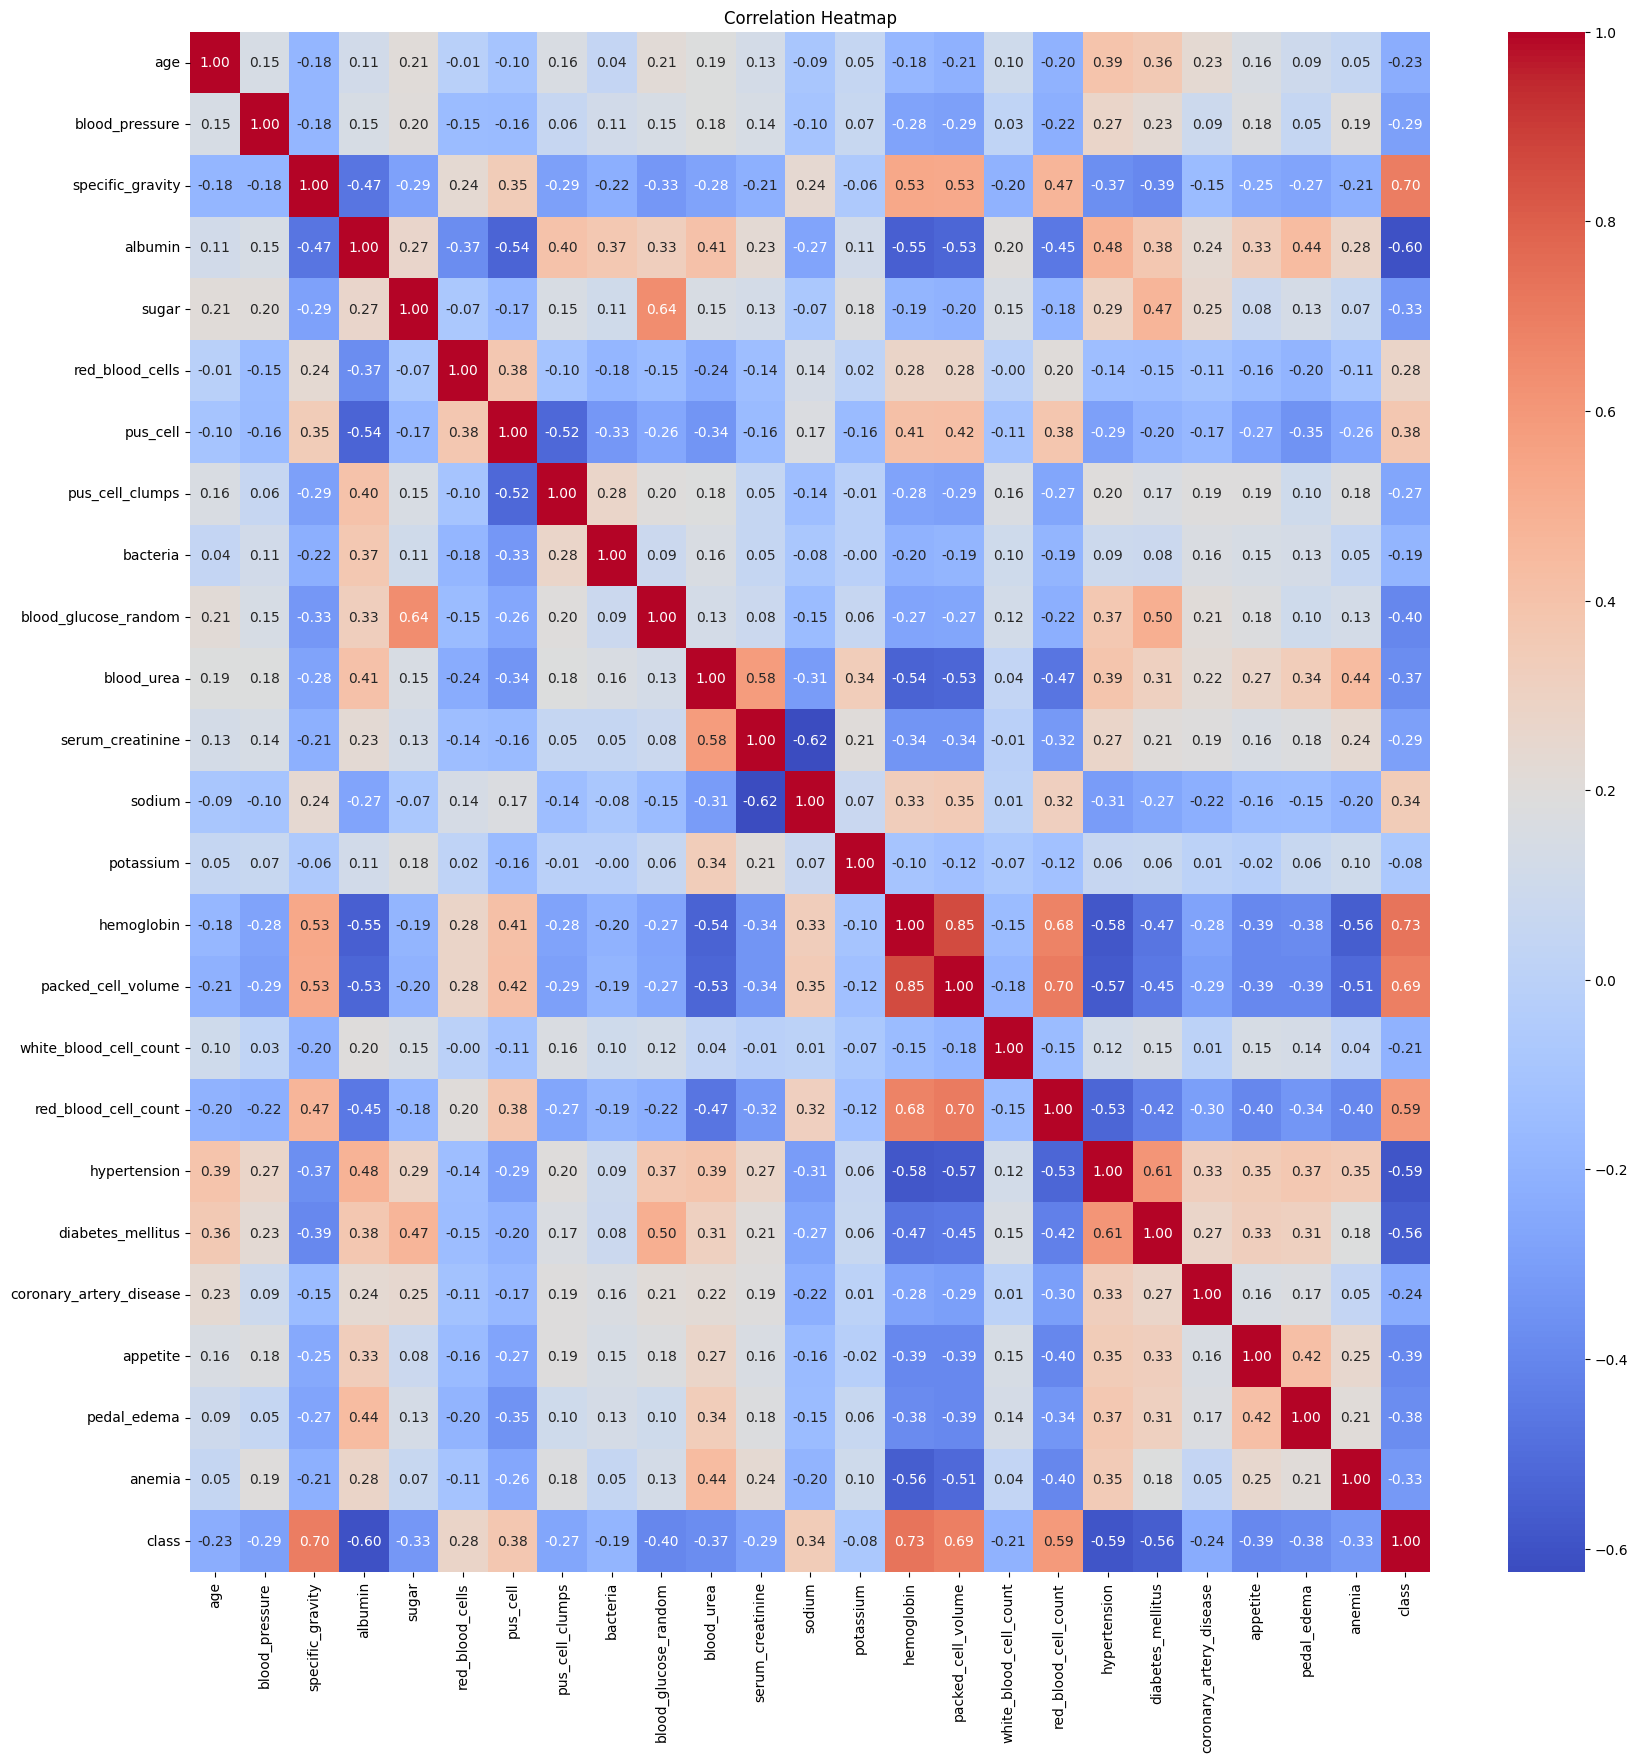

In [5]:
# ADD THIS CODE to a new cell at the end of your notebook
import matplotlib.pyplot as plt
import seaborn as sns
print("--- Generating Graphs for Milestone 3: Exploratory Data Analysis ---")

# 1. Visual Analysis: Target Variable Distribution
# This shows how many patients have CKD vs. not CKD in the dataset
print("\nGraph 1: Distribution of Diagnosis")
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Distribution of Chronic Kidney Disease Diagnosis (0=CKD, 1=Not CKD)')
plt.show()

# 2. Visual Analysis: Correlation Heatmap
# This shows how different features are related to each other
print("\nGraph 2: Correlation Heatmap of All Features")
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()